In [1]:
import sys
print(sys.executable)

E:\analytics\datasets_for_DA_proj_Self\esg-assure-compliance-engine\env\python.exe


C:\Users\TATHAGATA GHOSH\AppData\Local\Temp\ipykernel_16528\292893898.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Industry', y='Carbon_Emissions_MT', palette='viridis')


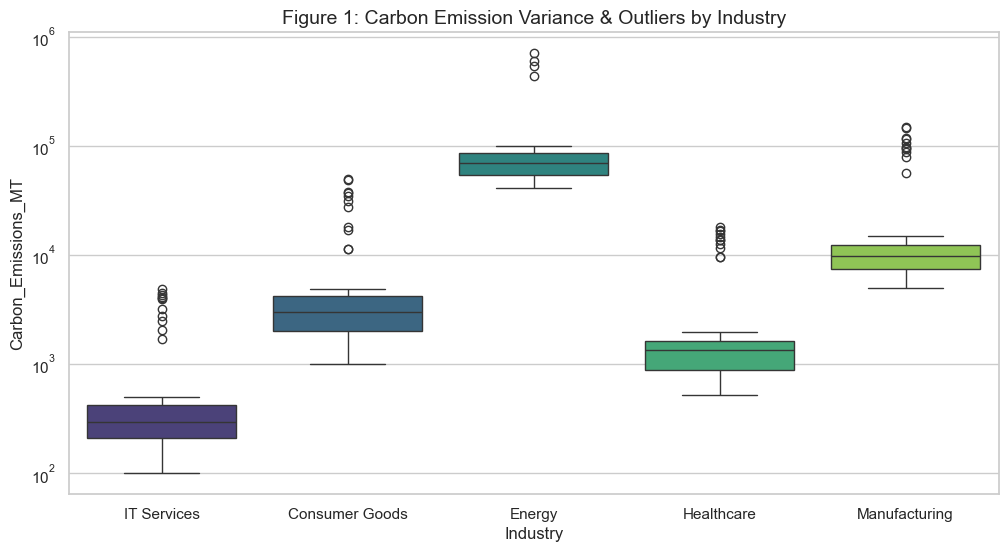

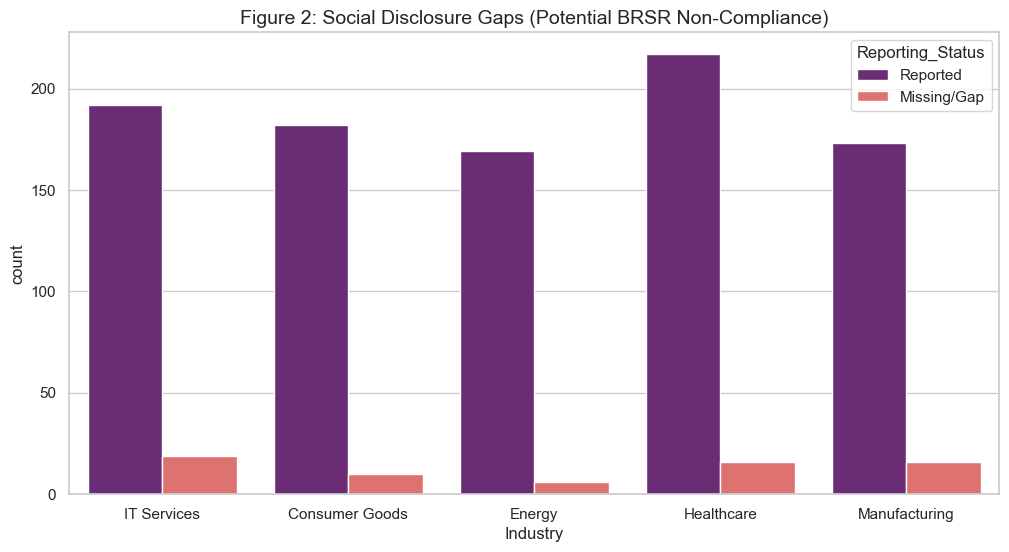

C:\Users\TATHAGATA GHOSH\AppData\Local\Temp\ipykernel_16528\292893898.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=risk_map, x='Issue', y='Count', palette='Reds_r')


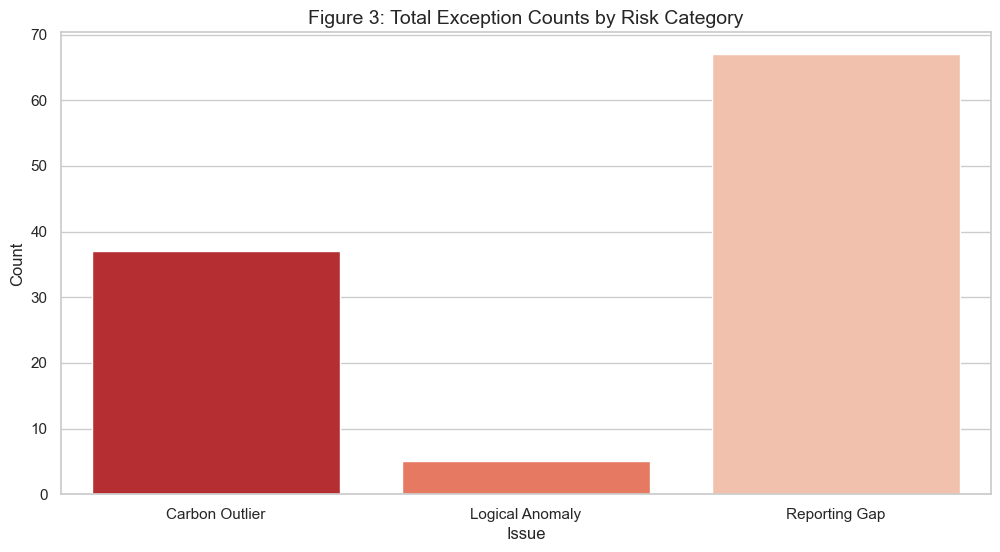

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data generated by your scripts
df = pd.read_csv('../data/suppliers_raw.csv')
exceptions = pd.read_csv('../data/audit_exceptions.csv')

# Set the style for an 'EY Professional' report
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# --- VIZ 1: Carbon Emission Distribution by Industry ---
# Purpose: Highlight the 'Extreme Outliers' (Potential Environmental Violations)
plt.figure()
sns.boxplot(data=df, x='Industry', y='Carbon_Emissions_MT', palette='viridis')
plt.title('Figure 1: Carbon Emission Variance & Outliers by Industry', fontsize=14)
plt.yscale('log') # Log scale because our outliers are 10x higher
plt.show()

# --- VIZ 2: The 'Missing Data' Social Risk ---
# Purpose: Show the 'Silence' in Social reporting (Compliance Risk)
plt.figure()
df['Reporting_Status'] = df['Social_Diversity_Score_%'].isna().map({True: 'Missing/Gap', False: 'Reported'})
sns.countplot(data=df, x='Industry', hue='Reporting_Status', palette='magma')
plt.title('Figure 2: Social Disclosure Gaps (Potential BRSR Non-Compliance)', fontsize=14)
plt.show()

# --- VIZ 3: Risk Concentration Heatmap ---
# Purpose: Identify where EY should send the Audit Team first
risk_map = exceptions.groupby(['Issue']).size().reset_index(name='Count')
plt.figure()
sns.barplot(data=risk_map, x='Issue', y='Count', palette='Reds_r')
plt.title('Figure 3: Total Exception Counts by Risk Category', fontsize=14)
plt.show()